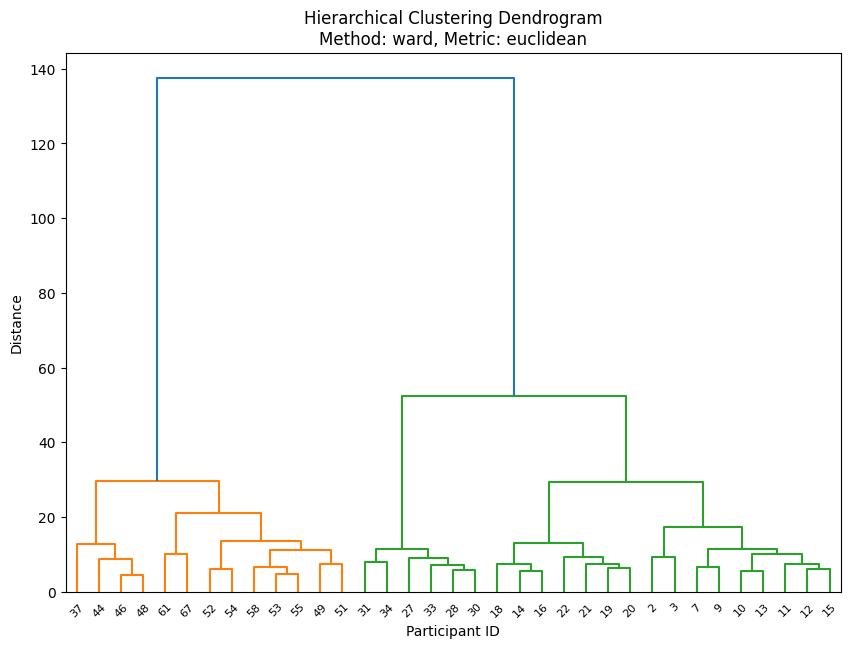

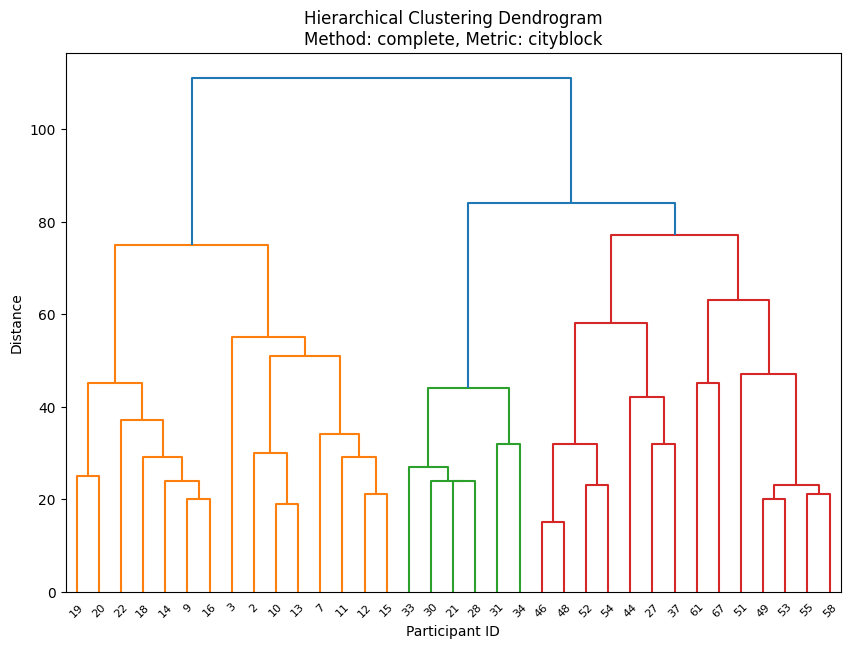


Method: ward, Metric: euclidean
Number of clusters: 2
Cluster 1: [37 44 46 48 49 51 52 53 54 55 58 61 67]
Cluster 2: [ 2  3  7  9 10 11 12 13 14 15 16 18 19 20 21 22 27 28 30 31 33 34]

Method: complete, Metric: cityblock
Number of clusters: 2
Cluster 1: [ 2  3  7  9 10 11 12 13 14 15 16 18 19 20 22]
Cluster 2: [21 27 28 30 31 33 34 37 44 46 48 49 51 52 53 54 55 58 61 67]


In [1]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r'C:\Users\xbots\Projekt-people-analytics\data\03_Processed\03_Filtered_Selected_Features.csv'
data = pd.read_csv(file_path)

# Drop non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Define methods and metrics for final experiments
final_methods_metrics = [
    ('ward', 'euclidean'),
    ('complete', 'cityblock')
]

# Function to plot dendrogram and get clusters with 2 clusters
def get_two_clusters(numeric_data, method, metric, cut_off):
    Z = linkage(numeric_data, method=method, metric=metric)
    
    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram_result = dendrogram(Z, labels=data['Participant ID'].values)
    plt.title(f'Hierarchical Clustering Dendrogram\nMethod: {method}, Metric: {metric}')
    plt.xlabel('Participant ID')
    plt.ylabel('Distance')
    plt.show()
    
    # Create clusters based on the cut-off
    clusters = fcluster(Z, cut_off, criterion='maxclust')
    return clusters

# Perform final experiments to get 2 clusters
final_results = []
for method, metric in final_methods_metrics:
    # Determine the cut-off to ensure 2 clusters
    cut_off = 2
    
    # Get clusters
    clusters = get_two_clusters(numeric_data, method, metric, cut_off)
    
    # Append results
    final_results.append((method, metric, clusters))

# Print and analyze the clusters
for method, metric, clusters in final_results:
    print(f"\nMethod: {method}, Metric: {metric}")
    unique_clusters = np.unique(clusters)
    print(f"Number of clusters: {len(unique_clusters)}")
    for cluster in unique_clusters:
        members = data['Participant ID'].values[clusters == cluster]
        print(f"Cluster {cluster}: {members}")